## Practica 1: Simple Neural Network from scratch

### Exercise: Construct a simple Neural Network from scratch
#### The idea is to define the architecture of your Neural Network. It means to construct neurons, the weights between the neurons and the biases attached to all the neurons, except for the first layer (i.e., the Input Layer).
#### 1.1 Define the parameters
#### As we have seen in the lecture, the parameters of a neural network are the weights and biases associated with the neurons.
#### 1) Define the variables NI (input neuron), NH (Neuron in the Hidden layer),and NO (output neuron). Then define w11 the weight between NI and NH, and $w_{21}$ the weight between NH and NO. Finally define the 2 biases, $b_H$ and $b_O$ associated to NH and NO.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
Define the variables NI (input neuron), NH (Neuron in the Hidden layer),and NO (output neuron). Then
define w11 the weight between NI and NH, and w21 the weight between NH and NO. Finally define the 2
biases, bH and bO associated to NH and NO.
'''
# Define an initial value to the 4 parameters as w11 = 0.001 ,bH = −0.001, w21 = 0.001, bO = −0.001.

# Variables
NI = 1.0  #

# Parameters
w11 = 0.001
bH  = -0.001

w21 =   0.001
bO  = - 0.001

# Forward Pass
NH = (NI * w11) + bH
NO = (NH * w21) + bO

In [2]:
# 3) Encapsulate all you have done in a function that you will name "init()"..
def init():
    w11 = 0.001
    w21 = 0.001

    bH = -0.001
    bO = -0.001

    return {
        "w11": w11,
        "w21": w21,
        "bH": bH,
        "bO": bO
    }

network_params = init()

In [3]:
# 4) Define 2 functions : Relu(x): return x if x > 0, 0 else, and linear(x) return x.

def relu(x):
    return x if x > 0 else 0

def linear(x):
    return x


In [4]:
# 5) Knowing you will use Relu as activation function on the hidden layer and linear() on the output layer,
#define the "my-NN(w11 ,bH, w21, bO, x )" that return the value of the evaluation for an input value x for
#the 4 parameters values.

def my_NN(w11, bH, w21, bO, x):
    NH = relu((x * w11) + bH)
    NO = linear((NH * w21) + bO)
    return NO

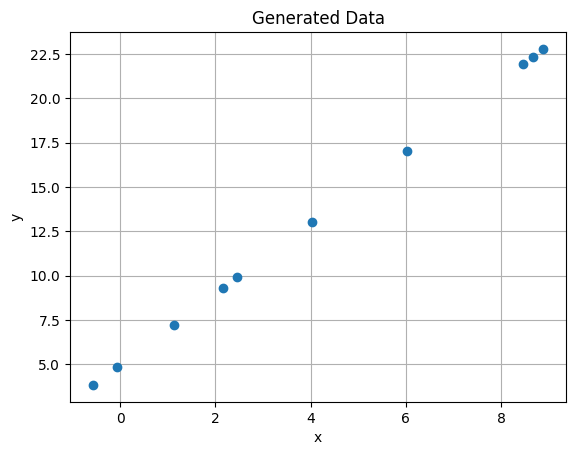

In [5]:
# 1.2 Generation of training set and validation set
#5) Create a function that generate N random values between -1 and 9. The function will return these random
# values (as x-array) and the corresponding points defined as y = ax + b with a = 2 and b = 5. This time we
# will not use noise, that will correspond to reproduce the behaviour of the function producing these points.

def generate_data(N):
    x = np.random.uniform(-1, 9, N)
    a = 2
    b = 5
    y = a * x + b
    return x, y


x_example, y_example = generate_data(10)
plt.plot(x_example, y_example, 'o')
plt.xlabel('x') 
plt.ylabel('y')
plt.title('Generated Data')
plt.grid()

In [6]:
# 6) Generate 1000 points for the training set (you have to keep the x-array and y-array)
x_train, y_train = generate_data(1000)

# 7) Generate 100 points for the validation set (you have to keep the x-array and y-array)
x_val, y_val = generate_data(100)

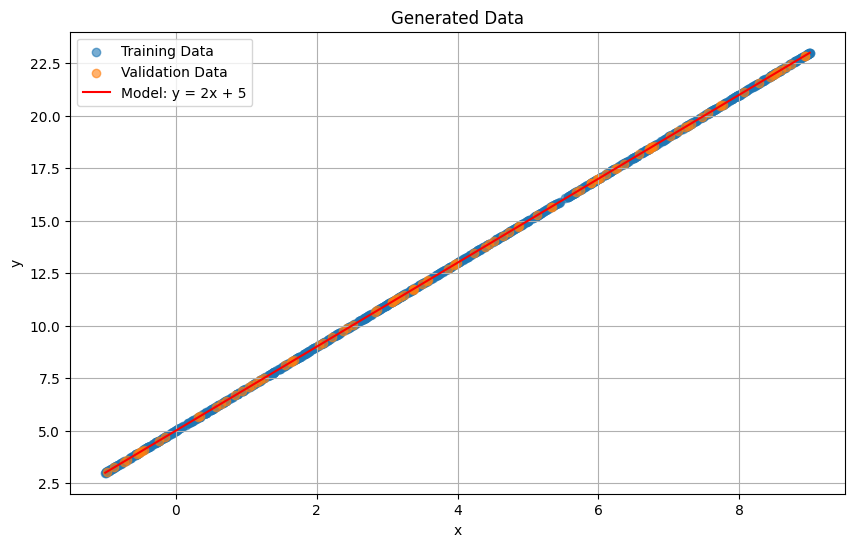

In [7]:
# 8) Plot your 2 sets of data and control that they leave over the whole data space of definition.
# 9) Overplot the model y = ax + b.

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', alpha=0.6)
plt.scatter(x_val, y_val, label='Validation Data', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.grid()

# Overplot the model
a = 2
b = 5
x_model = np.linspace(-1, 9, 100)
y_model = a * x_model + b
plt.plot(x_model, y_model, color='red', label='Model: y = 2x + 5')
plt.legend()
plt.show()  

In [27]:
params = init() # Get w11, w21, bH, bO
alpha = 0.0001  # Learning rate
delta = 0.001   
epochs = 50

loss_train = []      
loss_validation = [] 

# Loop over 50 epochs
for epoch in range(epochs):
    epoch_losses = []
    
    # Batch size = 1: Loop over each individual training example
    for x, y in zip(x_train, y_train):
        
        # 10) Evaluate & Save Loss Function (Current state)
        current_out = my_NN(params['w11'], params['bH'], params['w21'], params['bO'], x)
        current_loss = abs(current_out - y)
        epoch_losses.append(current_loss)
        
        # 11 & 12) Numerical Gradient Calculation and Parameter Update
        # We calculate the derivative for each parameter q: (L(q+delta) - L(q-delta)) / (2*delta)
        
        grads = {}
        for p_name in params:
            original_val = params[p_name]
            
            # Perturb +delta
            params[p_name] = original_val + delta
            out_plus = my_NN(params['w11'], params['bH'], params['w21'], params['bO'], x)
            loss_plus = abs(out_plus - y)
            
            # Perturb -delta
            params[p_name] = original_val - delta
            out_minus = my_NN(params['w11'], params['bH'], params['w21'], params['bO'], x)
            loss_minus = abs(out_minus - y)
            
            # Restore original value
            params[p_name] = original_val
            
            # Compute derivative (slope)
            derivative = (loss_plus - loss_minus) / (2 * delta)
            grads[p_name] = derivative
            
        # 12) Update parameters: q = q - alpha * derivative
        for p_name in params:
            params[p_name] -= alpha * grads[p_name]

    # 14) End of epoch: Store mean training loss
    loss_train.append(np.mean(epoch_losses))
    
    # 15) Evaluation on Validation Set (100 points)
    val_losses = []
    for xv, yv in zip(x_val, y_val):
        v_out = my_NN(params['w11'], params['bH'], params['w21'], params['bO'], xv)
        val_losses.append(abs(v_out - yv))
    
    loss_validation.append(np.mean(val_losses))
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {loss_train[-1]:.10f} - Val Loss: {loss_validation[-1]:.4f}")

print("Training Complete.")

Epoch 10/50 - Train Loss: 12.1909547088 - Val Loss: 12.2349
Epoch 20/50 - Train Loss: 1.1057884196 - Val Loss: 1.0419
Epoch 30/50 - Train Loss: 0.4202839043 - Val Loss: 0.3668
Epoch 40/50 - Train Loss: 0.0000000000 - Val Loss: 0.0000
Epoch 50/50 - Train Loss: 0.0000000000 - Val Loss: 0.0000
Training Complete.


## 1.4 Analysis of the results

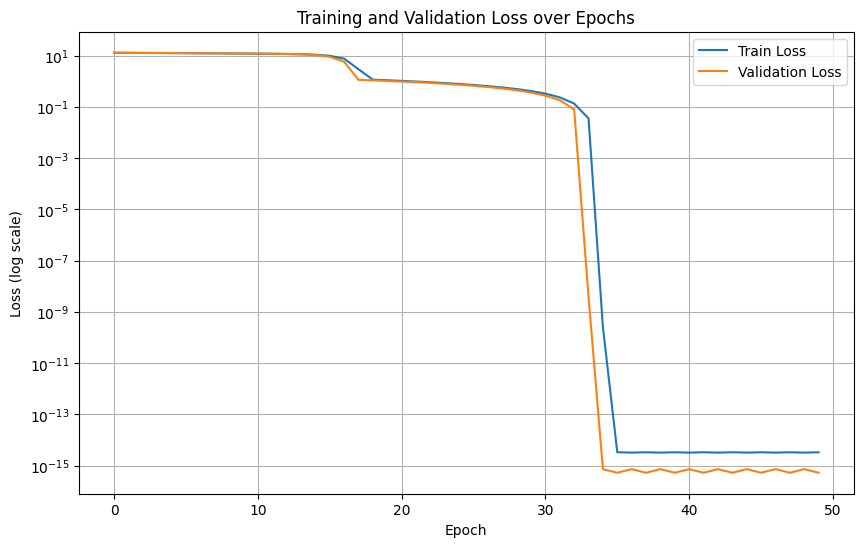

In [28]:
'''19) plot the evolution of the Loss-train and Loss-validation in a same plot. Use the "semilogy" matplotlib
function for this plot. Do the validation and the training set learn at the same time? Can you say that
your neural network is well-trained?
'''

plt.figure(figsize=(10, 6))
plt.semilogy(loss_train, label='Train Loss')
plt.semilogy(loss_validation, label='Validation Loss')    
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()              

In [29]:
# 20) Write the equation, depending on the 4 parameters, of the output value of your neural network.
def neural_network_output(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation
    Z2 = np.dot(A1, W2) + b2
    return Z2

#21) Considering that the training points are following a model y = ax + b, write the combination of the
#parameters that correspond to a and b when the Relu argument is positive.

W1 = np.array([[1, 0], [0, 1]])
b1 = np.array([0, 0])
W2 = np.array([[1, 0], [0, 1]])
b2 = np.array([0, 0])
